# Логистическая регрессия

Данное задание основано на материалах лекций по логистической регрессии.

## Вы научитесь:

• работать с логистической регрессией

 • реализовывать градиентный спуск для ее настройки

 • использовать регуляризацию

## Введение

Логистическая регрессия — один из видов линейных классификаторов. Одной из ее особенностей является возможность оценивания вероятностей классов, тогда как большинство линейных классификаторов могут выдавать только номера классов.
Логистическая регрессия использует достаточно сложный функционал качества, который не допускает записи решения в явном виде (в отличие от, например, линейной регрессии). Тем не менее, логистическую регрессию можно настраивать с помощью градиентного спуска.
Мы будем работать с выборкой, содержащей два признака. Будем считать, что ответы лежат в множестве {-1, 1}. Для настройки логистической регрессии мы будем решать следующую задачу:

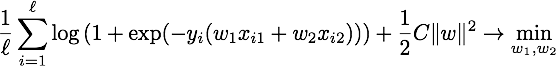

Здесь xi1 и xi2 — значение первого и второго признаков соответственно на объекте xi. В этом задании мы будем рассматривать алгоритмы без свободного члена, чтобы упростить работу.
Градиентный шаг для весов будет заключаться в одновременном обновлении весов w1 и w2 по следующим формулам (проверьте сами, что здесь действительно выписана производная нашего функционала):

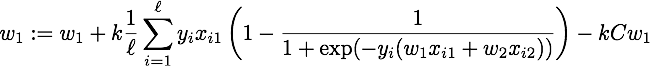

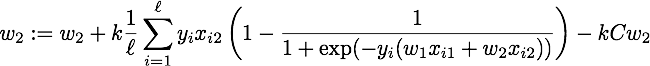

Здесь k — размер шага.
Линейные методы могут переобучаться и давать плохое качество из-за различных проблем в данных: мультиколлинеарности, зашумленности и т.д. Чтобы избежать этого, следует использовать регуляризацию — она позволяет понизить сложность модели и не допустить переобучения. Сила регуляризации определяется коэффициентом C в формулах, указанных выше.

## Реализация в Scikit-Learn

Загрузим данные из файла data-logistic.csv. Это двумерная выборка, целевая переменная на которой принимает значения -1 или 1:

In [17]:
import pandas as pd
df = pd.read_csv('data-logistic.csv',header=None)
target = df[0]
data = df.loc[:,1:]

Введём функции для градиентного спуска:

In [18]:
import math
def fw1(w1, w2, y, X, k, C):
    S = 0
    for i in range(len(y)):
        S += y[i]*X[1][i]*(1-1/(1+math.exp(-y[i]*(w1*X[1][i] + w2*X[2][i]))))
    return w1+(k*(1/len(y))*S)-k*C*w1

def fw2(w1, w2, y, X, k, C):
    S = 0
    for i in range(len(y)):
        S += y[i]*X[1][i]*(1-1/(1+math.exp(-y[i]*(w1*X[1][i] + w2*X[2][i]))))
    return w1+(k*(1/len(y))*S)-k*C*w2

Реализуем градиентный спуск для обычной и L2-регуляризованной (с коэффициентом регуляризации 10) логистической регрессии. Евклидово расстояние между векторами весов на соседних итерациях должно быть не больше 1e-5, а количество итераций ограничим сверху десятью тысячами:

In [41]:
def grad(y,X,C=0):
    i = 0
    k = 0.1
    w1 = 0
    w2 = 0
    max_iter = 10000
    err = 1e-5
    while True:
        i += 1
        w1_new = fw1(w1,w2,y,X,k,C)
        w2_new = fw2(w1,w2,y,X,k,C)
        e = math.sqrt((w1_new - w1)**2 + (w2_new - w2) ** 2)
        if e <= err or i == max_iter:
            break
        else:
            w1,w2 = w1_new,w2_new
    return [w1_new,w2_new]

Запустим градиентный спуск:

In [42]:
w1, w2 = grad(target, data)
rw1, rw2 = grad(target, data, C=10.0)

С помощью сигмоидной функции получим оценки вероятности:

In [43]:
def a(X, w1, w2):
    return 1/(1 + math.exp(-w1 * X[1] - w2 * X[2]))

score = data.apply(lambda x: a(x, w1, w2), axis=1)
rscore = data.apply(lambda x: a(x, rw1, rw2), axis=1)

Получим значения AUC-ROC без регуляризации значений и при её использовании:

In [44]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(target, score)
rauc = roc_auc_score(target, rscore)

print("{}, {}".format(round(auc,3),round(rauc,3)))

0.936, 0.936


При установке слишком длинного шага k алгоритм перестаёт сходиться.